In [1]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data
df = pd.read_csv(r'C:\Users\adshrivastava\Documents\R\others\Advanced Regression\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA Analysis

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Standardization is required

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- This suggests that we need to take care of nulls

### Taking care of Null Values

In [5]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

- This suggest that few fields have more than 15% missing values. which can be dropped

In [6]:
# Dropping cols with more than 15% missing values

for i in df.columns:
    if(((df[i].isnull().mean())) >= 0.15):
        df.drop(i, 1, inplace = True)
        
df.isnull().mean()    

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC   

In [7]:
# Removing rows with column 'GarageYrBlt' having null values
df = df[~df['GarageYrBlt'].isnull()]

In [8]:
# Imputing "MasVnrType" with hightest occurance of value in the column 
df['MasVnrType'].value_counts(dropna = False)

None       789
BrkFace    439
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [9]:
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None')

In [10]:
# Imputing "MasVnrArea" with hightest occurance of value in the column 
df['MasVnrArea'].value_counts(dropna = False)

0.0       786
72.0        8
108.0       8
NaN         8
180.0       8
16.0        7
120.0       6
80.0        6
106.0       6
200.0       6
340.0       6
360.0       5
320.0       5
84.0        5
170.0       5
132.0       5
178.0       4
246.0       4
183.0       4
100.0       4
168.0       4
216.0       4
160.0       4
252.0       4
196.0       4
300.0       4
456.0       4
288.0       4
76.0        4
40.0        4
336.0       4
268.0       4
220.0       4
210.0       4
74.0        3
50.0        3
110.0       3
169.0       3
70.0        3
272.0       3
208.0       3
240.0       3
420.0       3
90.0        3
186.0       3
148.0       3
99.0        3
44.0        3
82.0        3
42.0        3
174.0       3
350.0       3
116.0       3
145.0       3
85.0        3
128.0       3
312.0       3
226.0       3
130.0       3
256.0       3
270.0       3
166.0       3
176.0       3
162.0       2
205.0       2
101.0       2
135.0       2
362.0       2
147.0       2
215.0       2
285.0       2
245.0 

In [11]:
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, 0.0)

In [12]:
# Imputing "BsmtQual" with hightest occurance of value in the column 
df['BsmtQual'].value_counts(dropna = False)

Gd     601
TA     595
Ex     121
Fa      32
NaN     30
Name: BsmtQual, dtype: int64

In [13]:
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'Gd')

In [14]:
# Imputing "BsmtCond" with hightest occurance of value in the column 
df['BsmtCond'].value_counts(dropna = False)

TA     1247
Gd       63
Fa       38
NaN      30
Po        1
Name: BsmtCond, dtype: int64

In [15]:
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'TA')

In [16]:
# Imputing "BsmtExposure" with hightest occurance of value in the column 
df['BsmtExposure'].value_counts(dropna = False)

No     896
Av     213
Gd     128
Mn     111
NaN     31
Name: BsmtExposure, dtype: int64

In [17]:
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No')

In [18]:
# Imputing "BsmtFinType1" with hightest occurance of value in the column 
df['BsmtFinType1'].value_counts(dropna = False)

GLQ    408
Unf    396
ALQ    209
BLQ    141
Rec    126
LwQ     69
NaN     30
Name: BsmtFinType1, dtype: int64

In [19]:
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'GLQ')

In [20]:
# Imputing "BsmtFinType2" with hightest occurance of value in the column 
df['BsmtFinType2'].value_counts(dropna = False)

Unf    1186
Rec      53
LwQ      46
BLQ      32
NaN      31
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64

In [21]:
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'Unf')

In [22]:
# Imputing "Electrical" with hightest occurance of value in the column 
df['Electrical'].value_counts(dropna = False)

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [23]:
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr')

In [24]:
# We dont need column "Id" hence dropping it
df.drop(['Id'], axis = 1, inplace = True) 
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Mapping of Variable

In [25]:
# MSSubClass
df['MSSubClass'] = df['MSSubClass'].replace([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190],['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES', '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES'])

# MSZoning
df['MSZoning'] = df['MSZoning'].replace(['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'],['Agriculture', 'Commercial', 'Floating Village Residential', 'Industrial', 'Residential High Density', 'Residential Low Density', 'Residential Low Density Park', 'Residential Medium Density'])

# Street
df['Street'] = df['Street'].replace(['Grvl', 'Pave'],['Gravel', 'Paved'])

# OverallCond
df['OverallCond'] = df['OverallCond'].replace([10, 9, 8, 7, 6, 5, 4, 3, 2, 1],['Very Excellent', 'Excellent', 'Very Good', 'Good', 'Above Average', 'Average', 'Below Average', 'Fair', 'Poor', 'Very Poor'])

# OverallQual
df['OverallQual'] = df['OverallQual'].replace([10, 9, 8, 7, 6, 5, 4, 3, 2, 1],['Very Excellent', 'Excellent', 'Very Good', 'Good', 'Above Average', 'Average', 'Below Average', 'Fair', 'Poor', 'Very Poor'])

# MasVnrType
df['MasVnrType'] = df['MasVnrType'].replace(['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'],['Brick Common', 'Brick Face', 'Cinder Block', 'None', 'Stone'])

### Changing data type of columns

In [26]:
vars = ['LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

for i in vars:
    df[i] = df[i].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1379 non-null object
MSZoning         1379 non-null object
LotArea          1379 non-null int64
Street           1379 non-null object
LotShape         1379 non-null object
LandContour      1379 non-null object
Utilities        1379 non-null object
LotConfig        1379 non-null object
LandSlope        1379 non-null object
Neighborhood     1379 non-null object
Condition1       1379 non-null object
Condition2       1379 non-null object
BldgType         1379 non-null object
HouseStyle       1379 non-null object
OverallQual      1379 non-null object
OverallCond      1379 non-null object
YearBuilt        1379 non-null int64
YearRemodAdd     1379 non-null int64
RoofStyle        1379 non-null object
RoofMatl         1379 non-null object
Exterior1st      1379 non-null object
Exterior2nd      1379 non-null object
MasVnrType       1379 non-null object
MasVnrArea       1379 

In [27]:
df_copy = df

### Creating Dummies

In [28]:
vars1 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
        'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
        'SaleType', 'SaleCondition', 'MoSold', 'HeatingQC']

for i in vars1:
    # Creating dummy variables for the features
    ml = pd.get_dummies(df[i], prefix=i)
    
    #Adding the results to the master dataframe
    df = pd.concat([df,ml], axis=1)



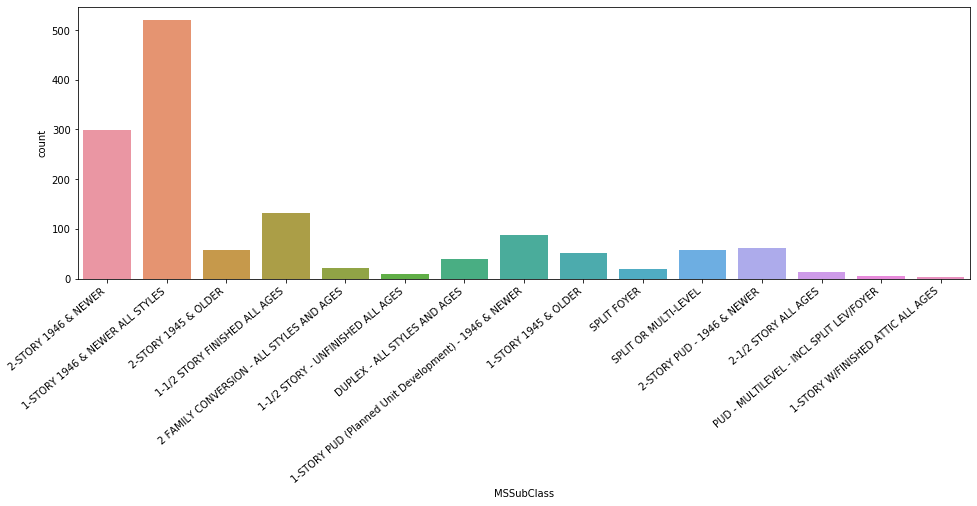

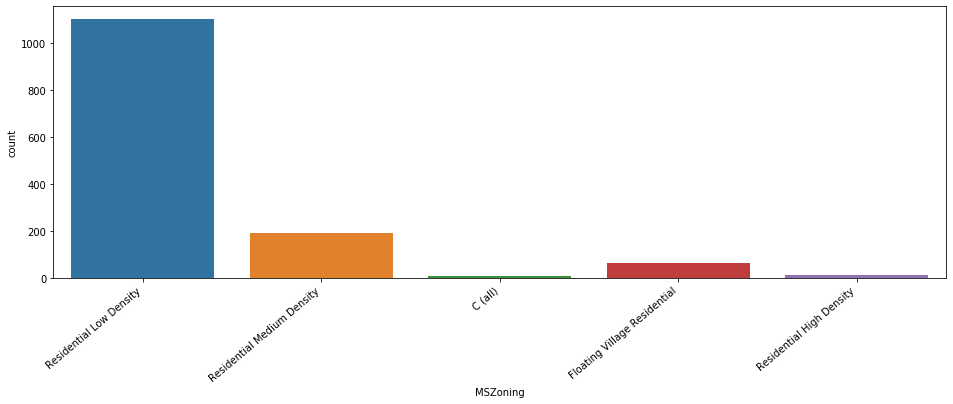

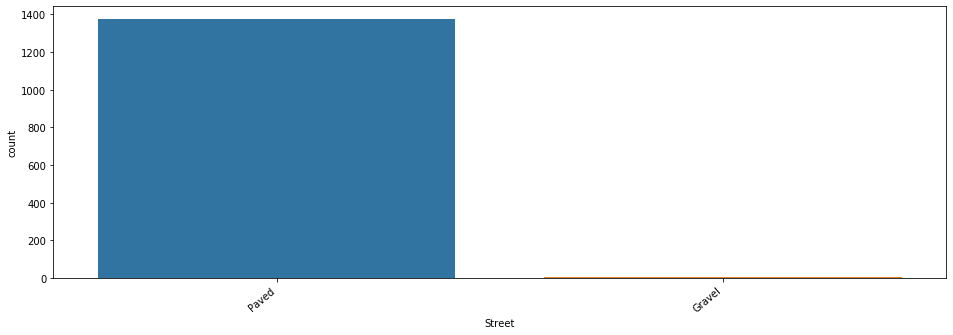

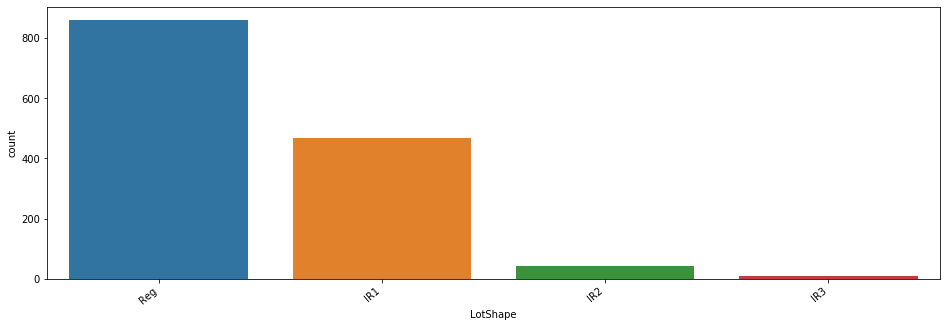

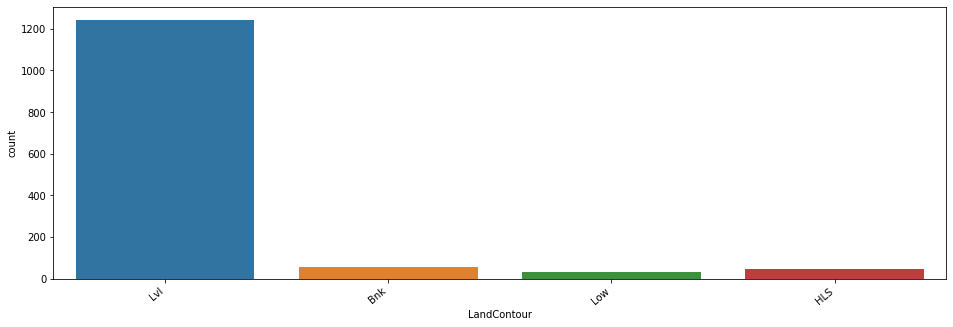

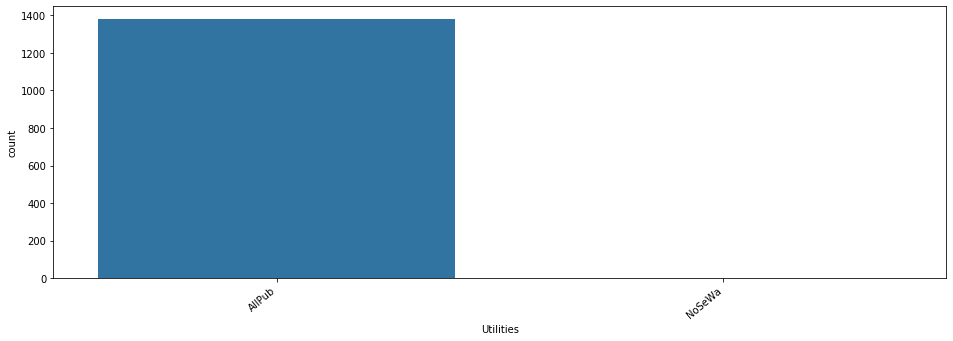

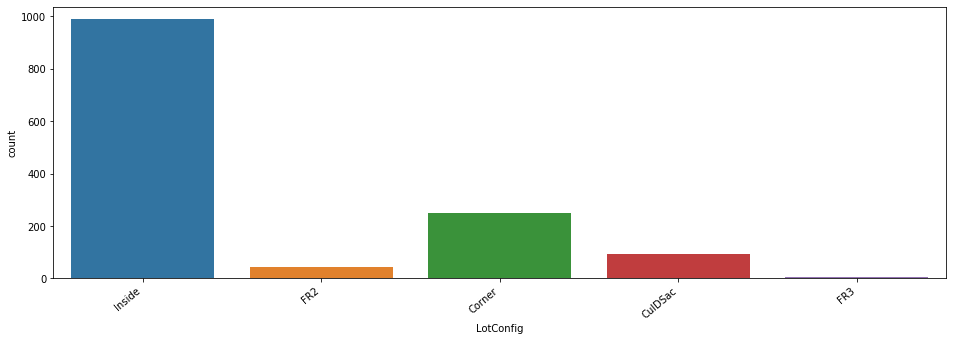

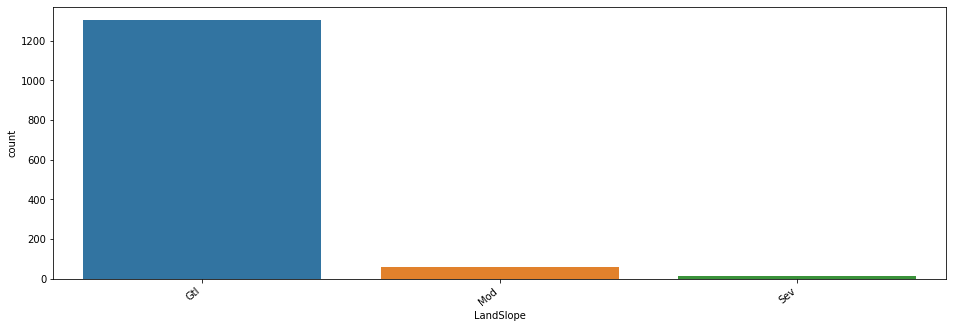

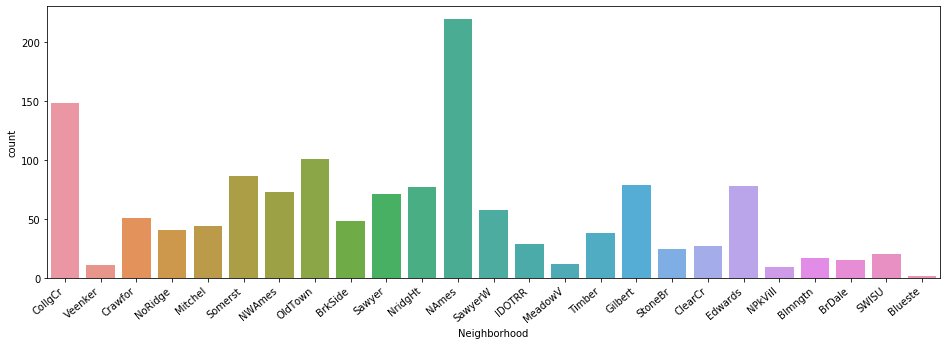

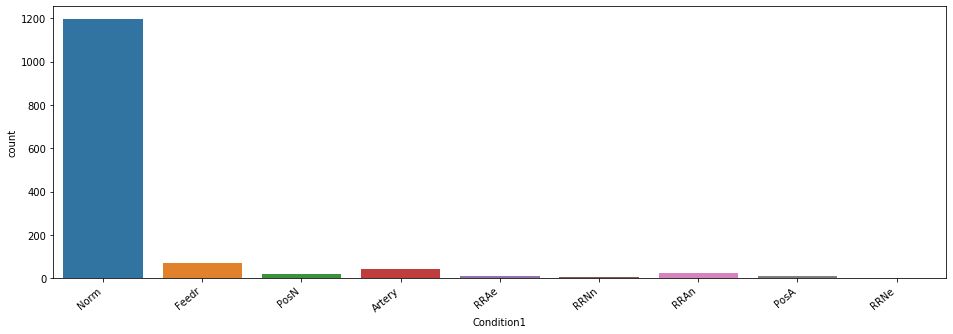

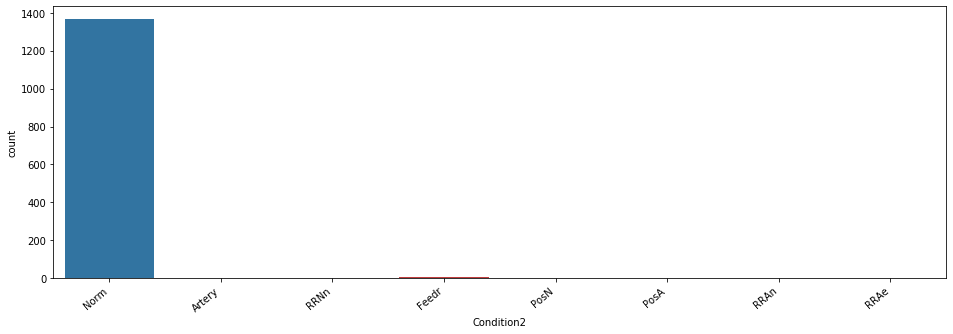

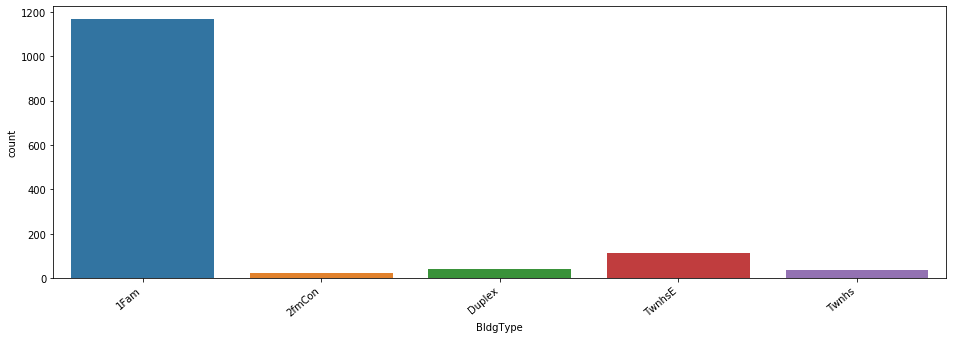

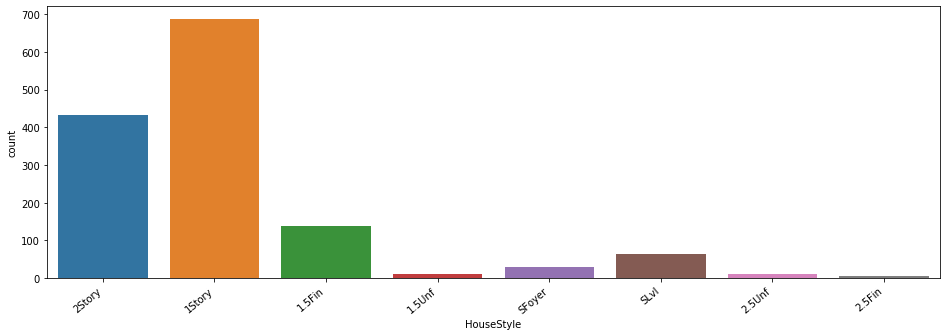

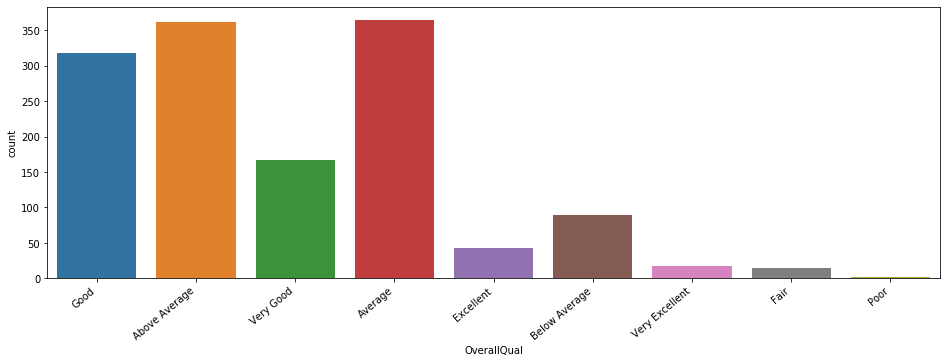

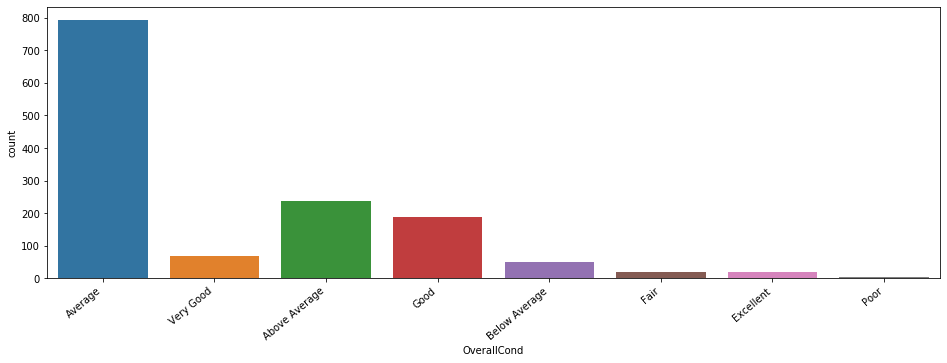

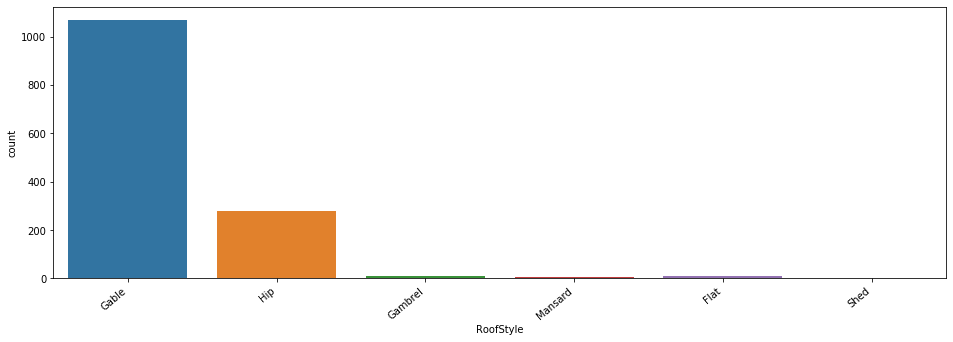

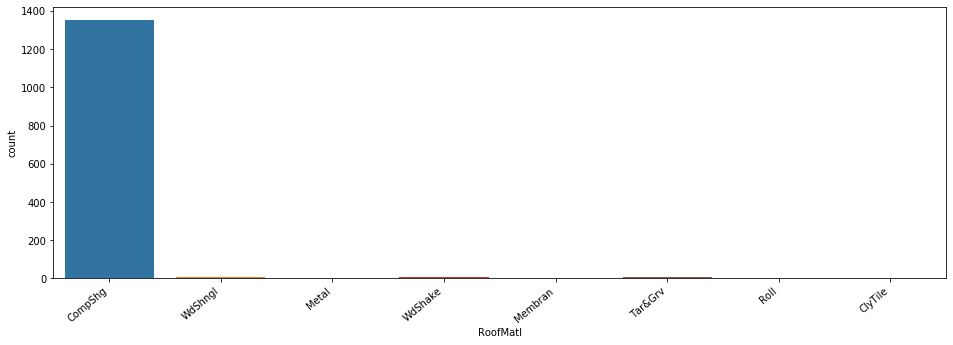

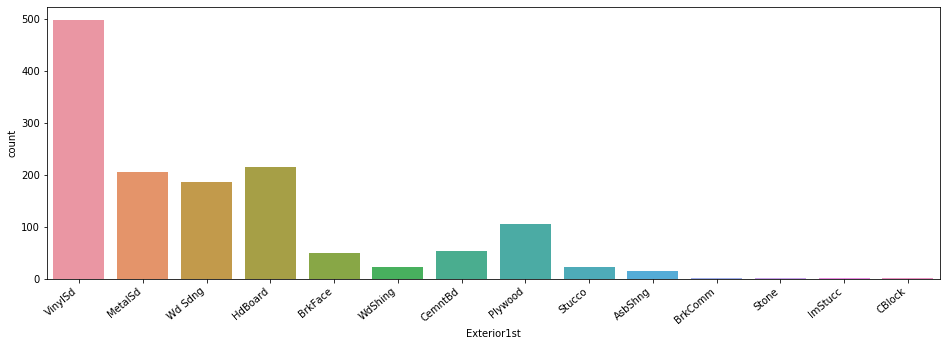

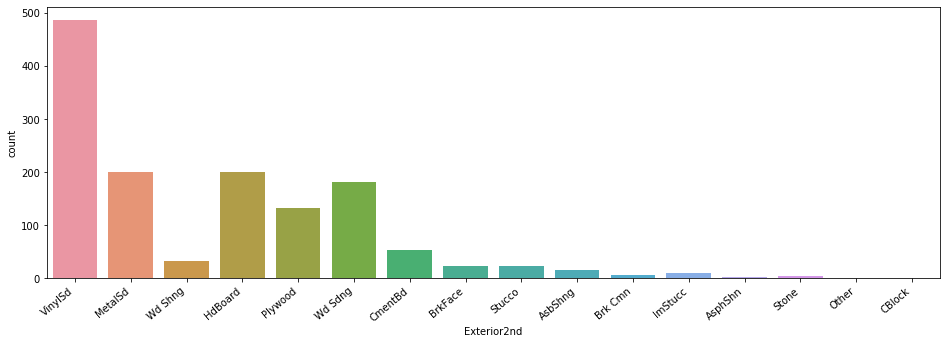

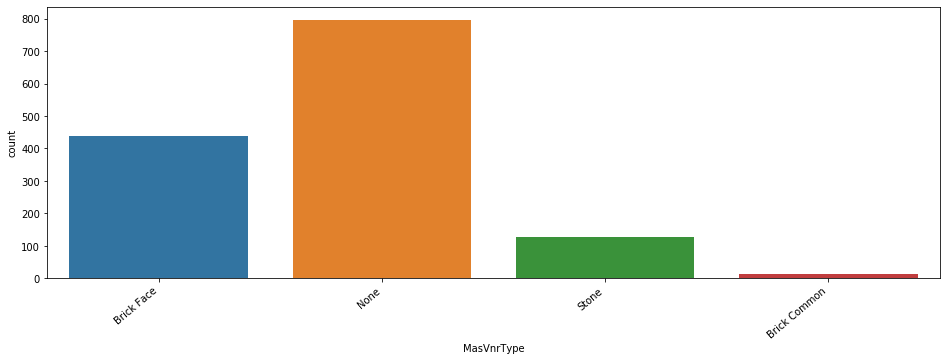

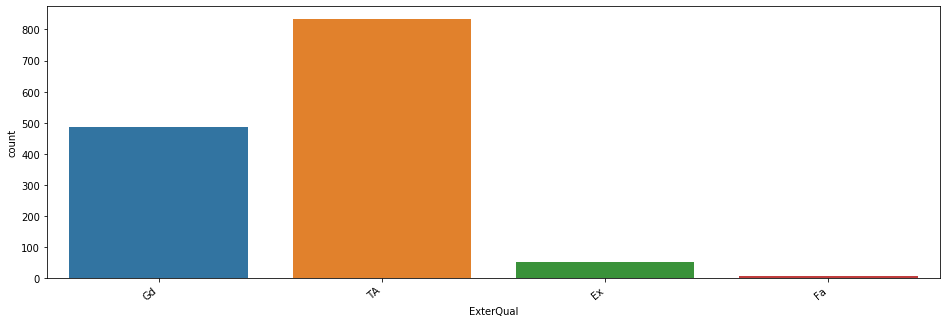

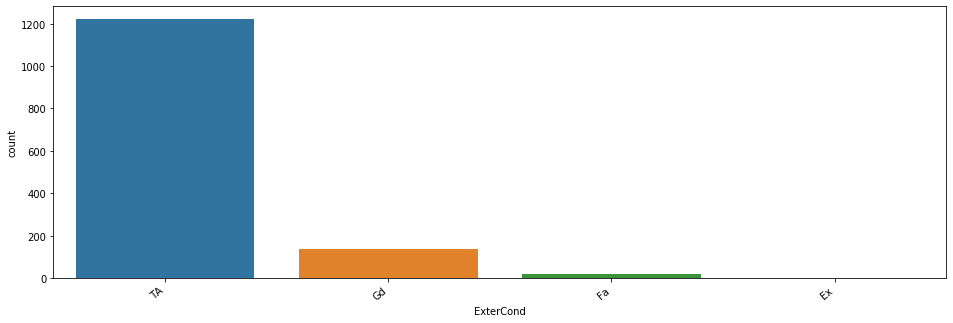

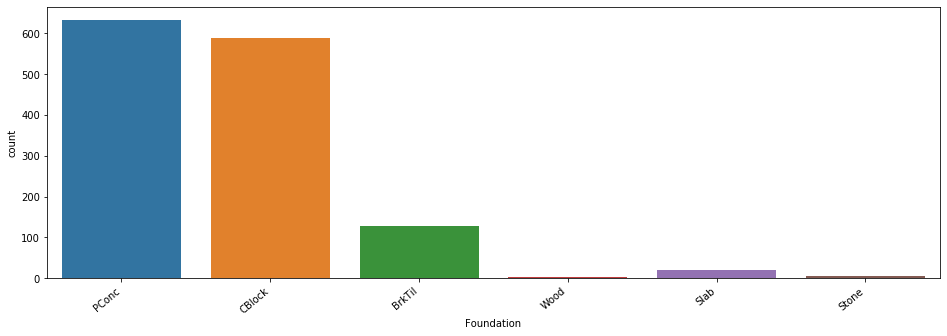

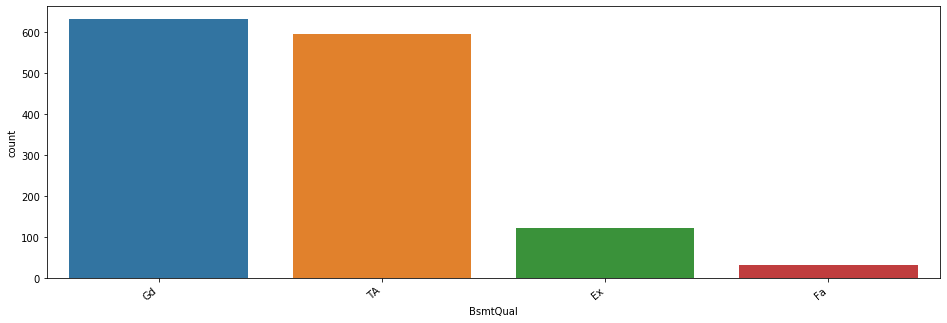

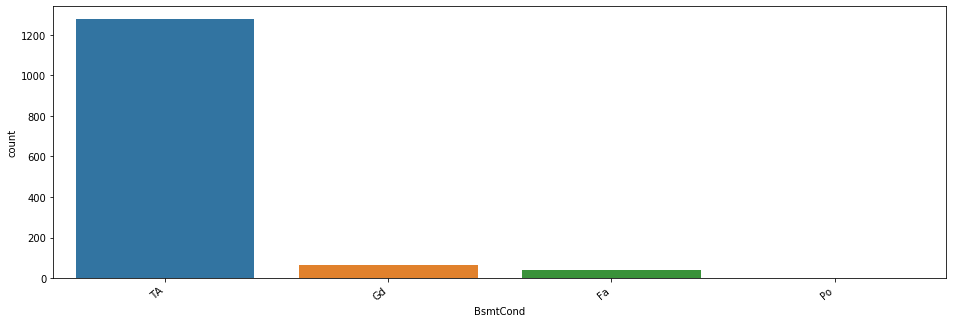

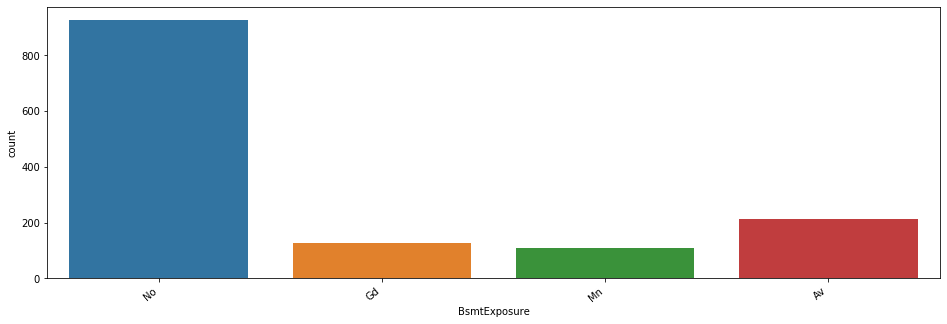

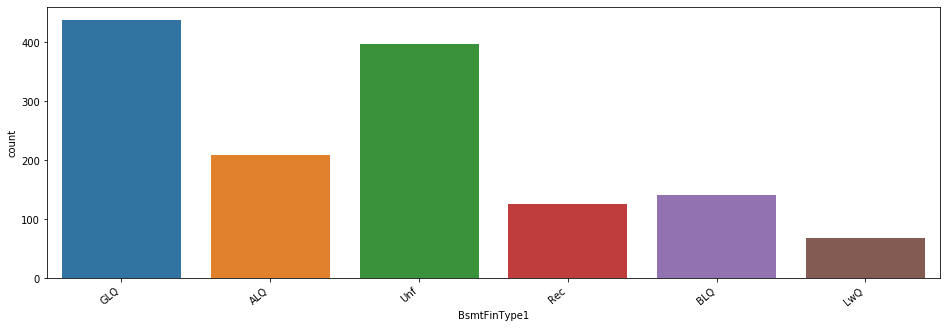

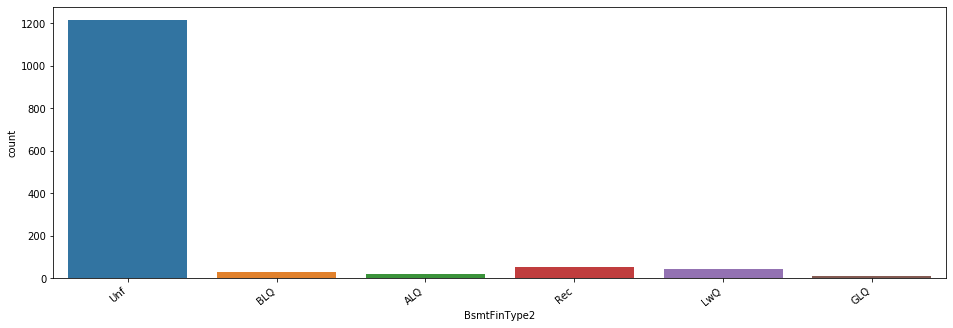

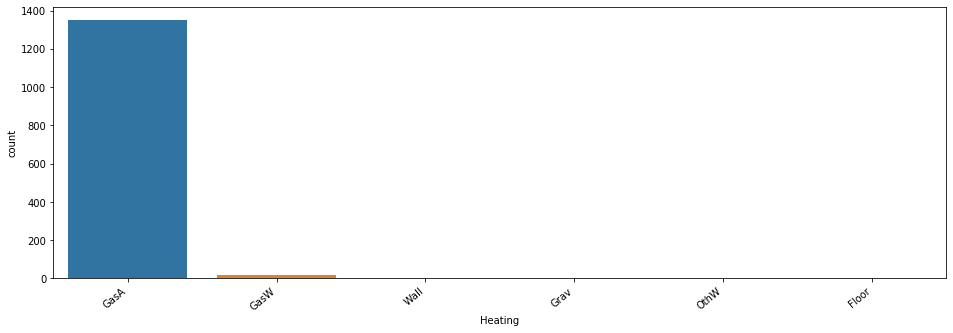

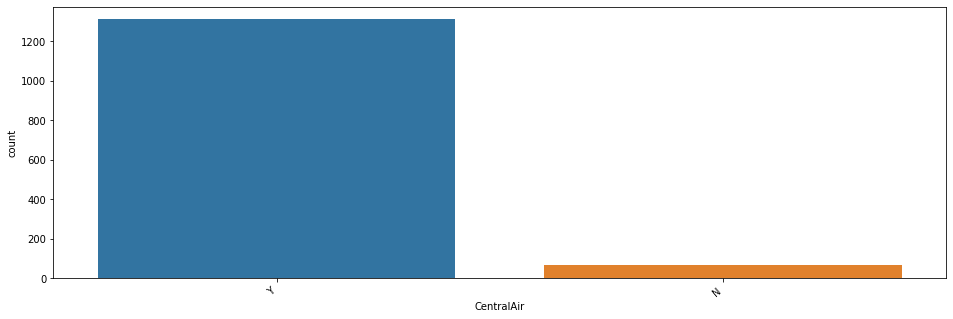

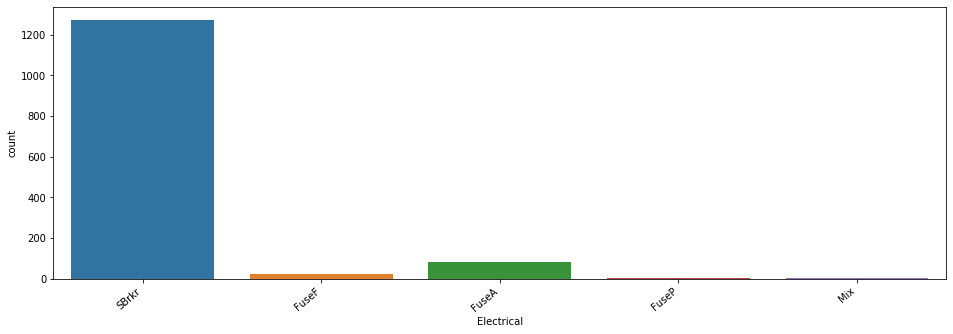

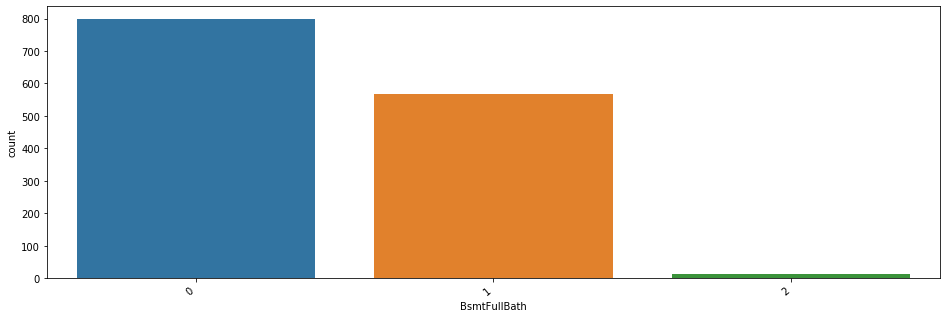

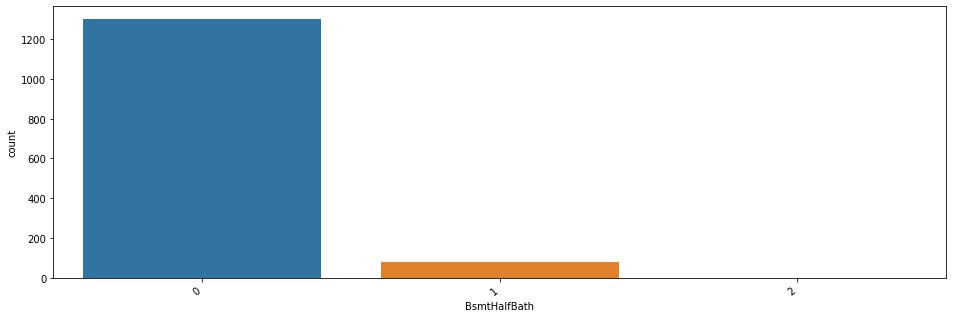

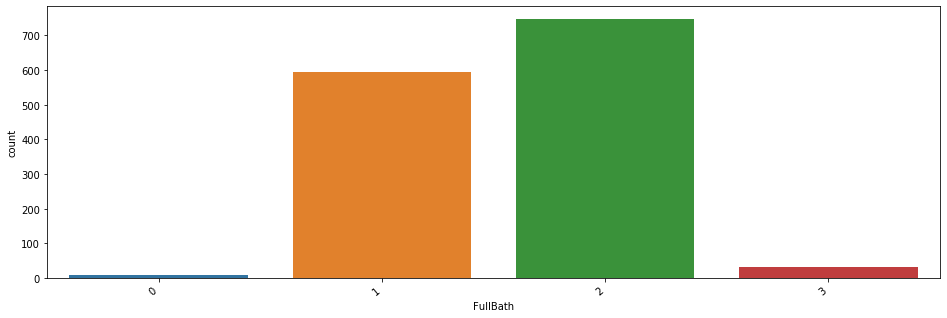

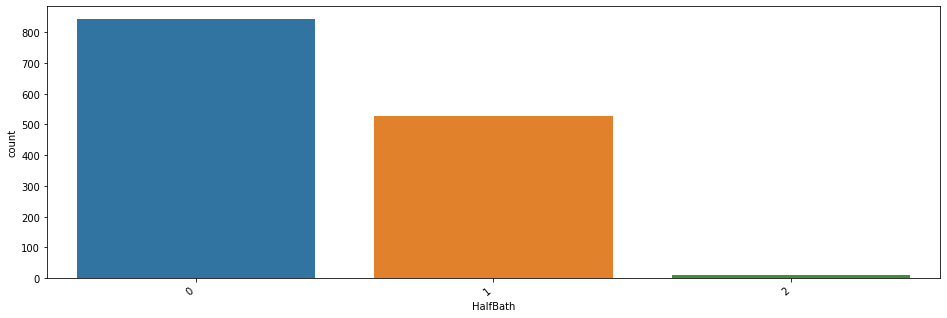

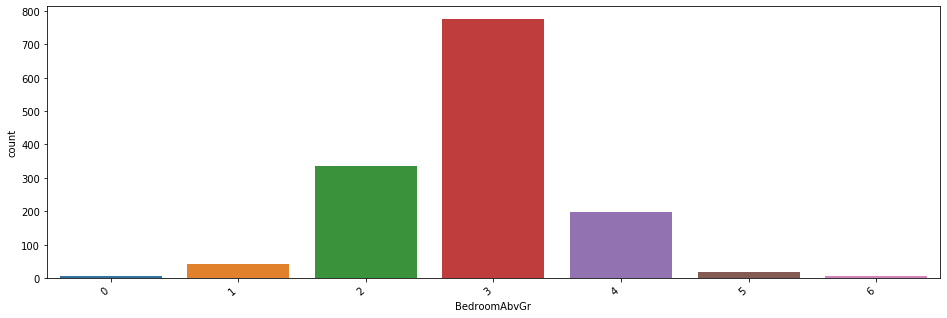

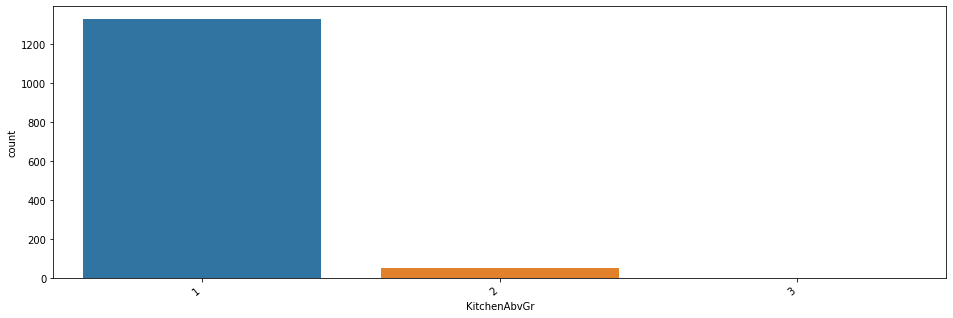

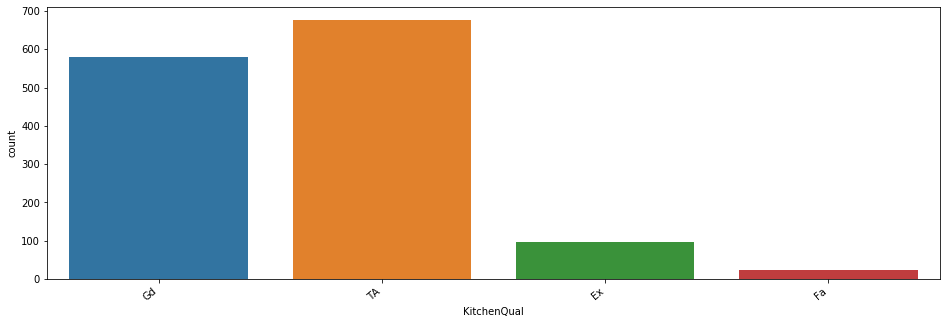

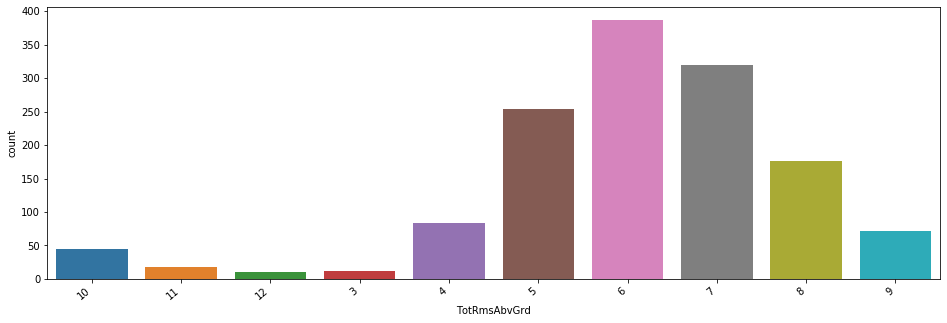

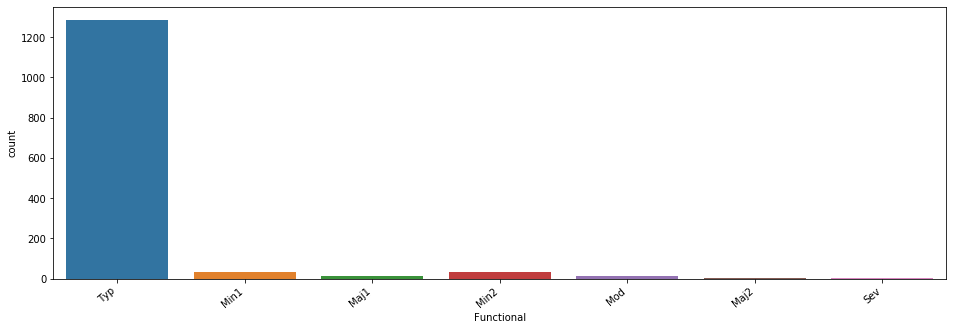

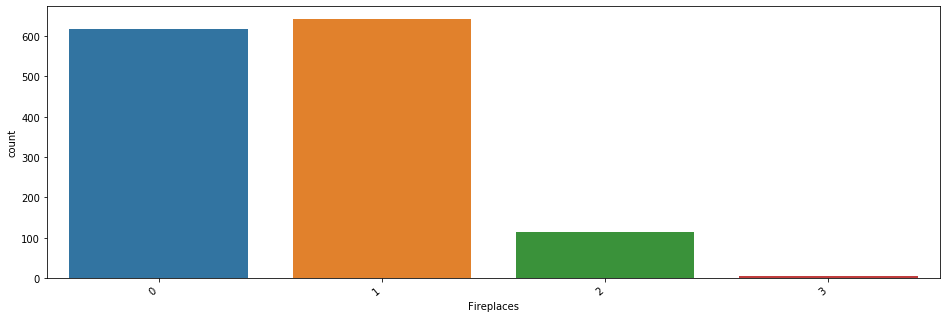

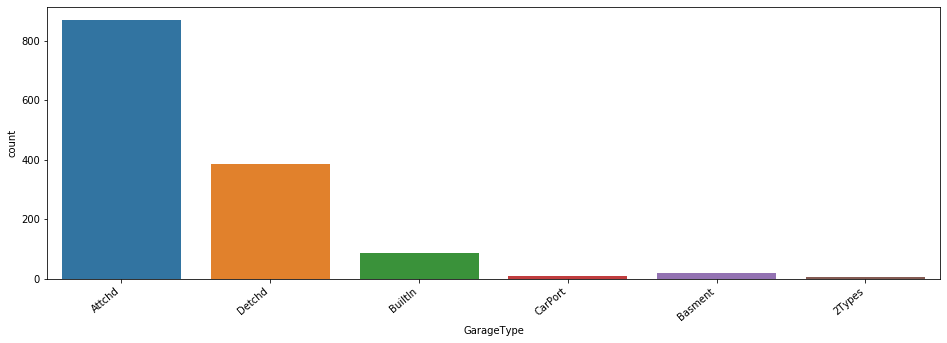

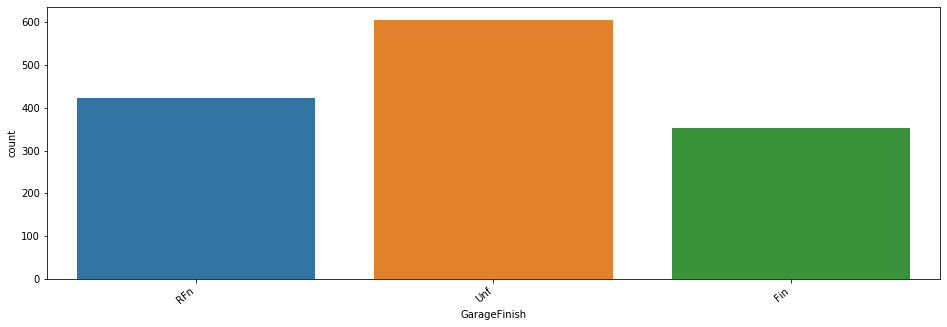

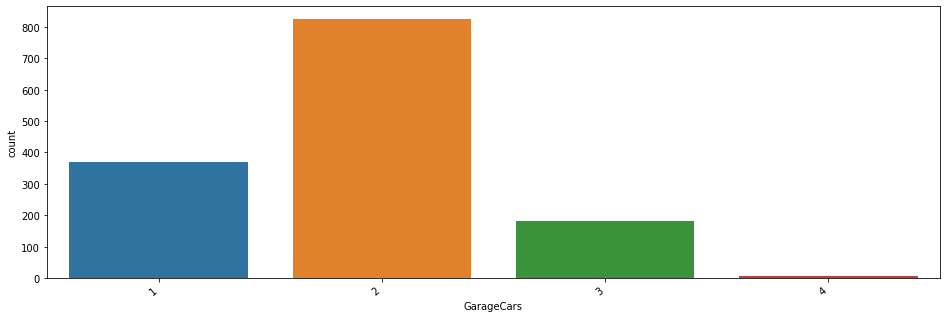

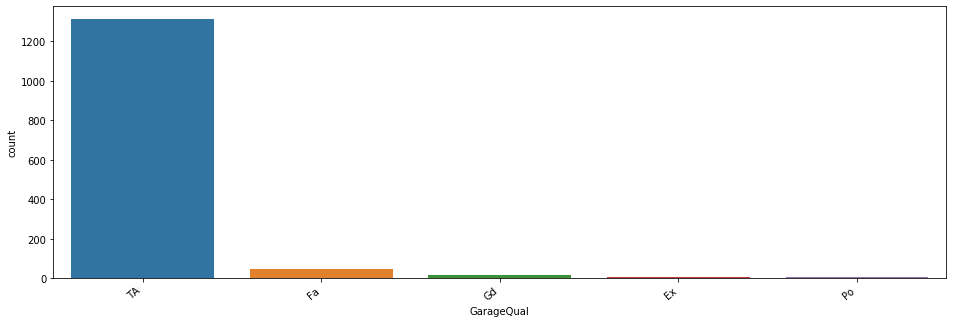

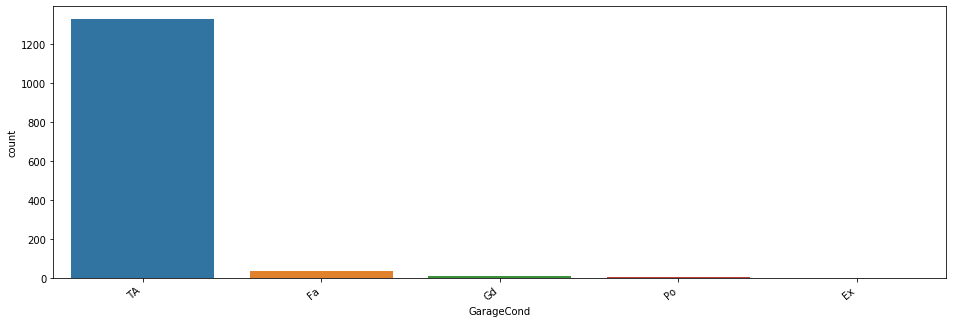

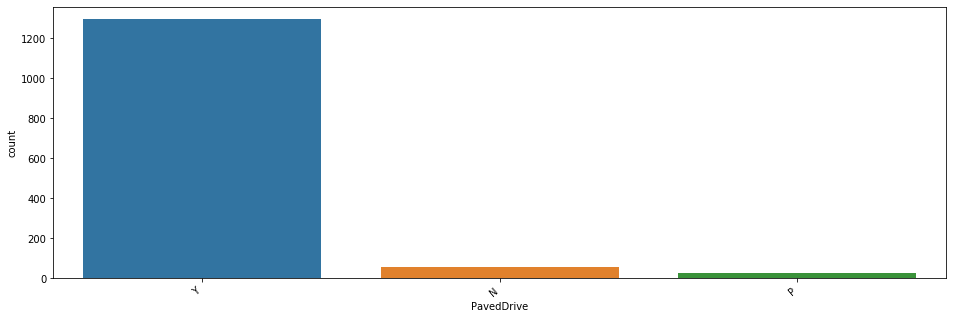

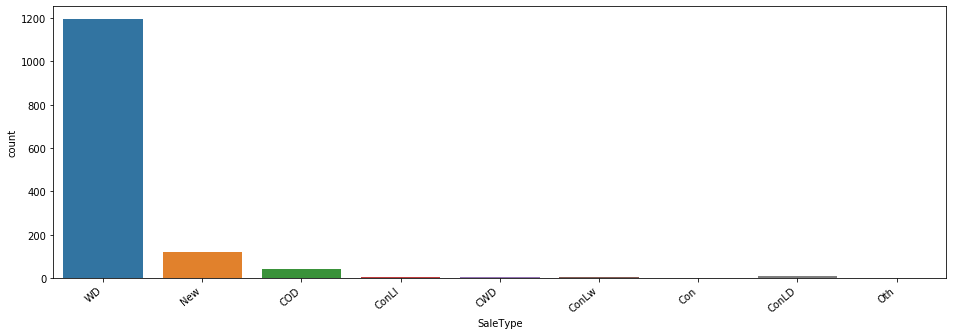

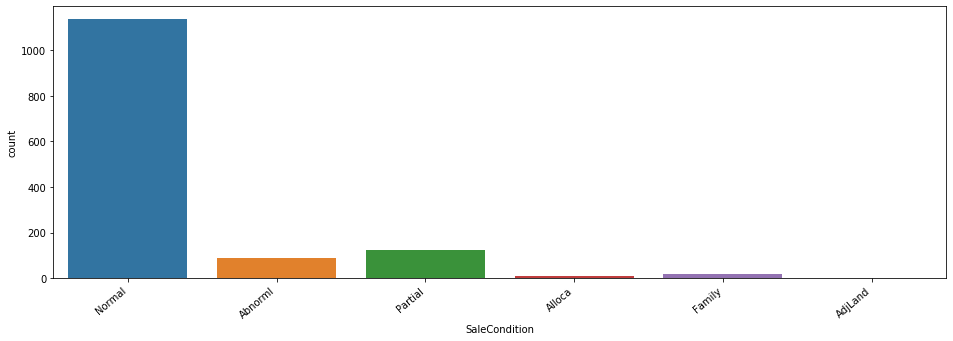

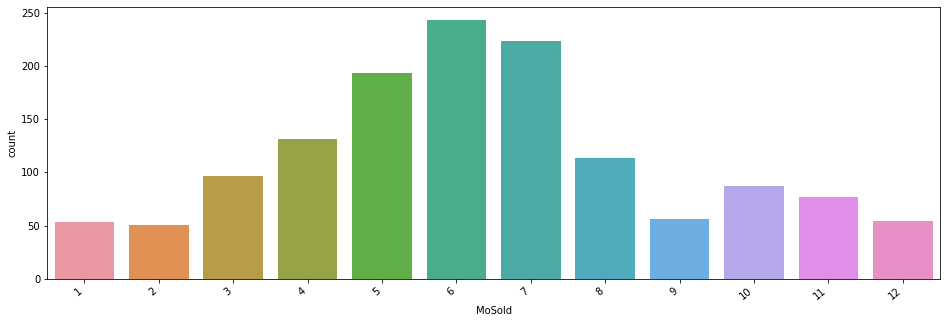

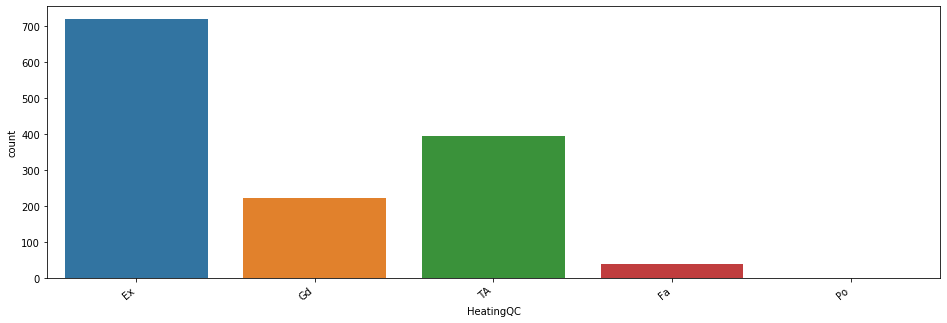

In [29]:
# Exploring dummy variables
for i in vars1:
    plt.figure(figsize=(16,5))
    ax = sns.countplot(x =i, data = df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

In [30]:
# We have created dummies for the variables, so we can drop them
df = df.drop(vars1, 1)

- A few of the columns can be dropped which does not have any significance or have very less counts

In [31]:
# Removing some columns which are not required
vars2 = ['CentralAir_N', 'SaleCondition_AdjLand', 'GarageCars_4', 'GarageType_2Types', 'Fireplaces_3', 'Functional_Sev', 'FullBath_0',
        'BsmtHalfBath_2', 'KitchenAbvGr_3', 'BsmtCond_Po', 'Foundation_Wood', 'ExterCond_Ex', 'ExterQual_Fa', 'RoofStyle_Shed',
        'OverallCond_Poor', 'OverallQual_Poor', 'Utilities_NoSeWa', 'Street_Gravel']

for i in vars2:
    df = df.drop([i], 1)

    
df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_C (all),MSZoning_Floating Village Residential,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Street_Paved,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Above Average,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Very Excellent,OverallQual_Very Good,OverallCond_Above Average,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Very Good,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Brick Common,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFi

### Scaling and Test-Train Splitting

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [33]:
# Putting feature variable to X
X = df.drop(['SalePrice'], axis=1)

X.shape


(1379, 321)

In [34]:
# Putting response variable to y
y = df['SalePrice']

y.shape

(1379,)

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Model Building and Evaluation

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train Rsquare = ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test Rsquare = ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
# print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
# print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
# print(mse_train_lr)
metric.append(mse_train_lr*0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
# print(mse_test_lr)
metric.append(mse_test_lr*0.5)

Train Rsquare =  0.9600917534498419
Test Rsquare =  0.740002243123565


- Here we notice that the Rsquare value of train set is very high as comapred to test set which means that the model is overfitting and has low bias for the features, this would mean that due to small change in the train set this will create change in model and hence model will show high variance

### Ridge Regression

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   11.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [40]:
# Printing the best hyperparameter alpha
alpha_ridge = model_cv.best_params_['alpha']
print('alpha = ',alpha_ridge)

alpha =  20


In [41]:
# Fitting Ridge model for best alpha and printing coefficient which have been penalized

ridge = Ridge(alpha = alpha_ridge)

ridge.fit(X_train,y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [42]:
# Let's calculate R2 for test and train data set
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train Rsquare = ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test Rsquare = ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
# print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
# print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
# print(mse_train_lr)
metric2.append(mse_train_lr*0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
# print(mse_test_lr)
metric2.append(mse_test_lr*0.5)

Train Rsquare =  0.9099397789491321
Test Rsquare =  0.8258079824418523


In [43]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-170967.399, 'constant'),
 (18922.972, 'GarageCars_3'),
 (18685.672, 'OverallQual_Very Excellent'),
 (-16180.847, 'RoofMatl_ClyTile'),
 (16141.409, 'Neighborhood_NoRidge'),
 (-15821.061, 'TotRmsAbvGrd_12'),
 (15566.281, 'KitchenQual_Ex'),
 (14820.277, 'BsmtQual_Ex'),
 (14674.759, 'OverallQual_Excellent'),
 (14374.088, 'FullBath_3'),
 (-13233.039, 'Neighborhood_Edwards'),
 (13154.5, 'Fireplaces_2'),
 (12664.709, 'RoofMatl_WdShngl'),
 (-12034.085, 'GarageCars_1'),
 (11652.532, 'Neighborhood_StoneBr'),
 (11636.775, 'Functional_Typ'),
 (11461.834, 'TotRmsAbvGrd_10'),
 (11214.937, 'Exterior1st_BrkFace'),
 (11187.398, 'BsmtExposure_Gd'),
 (-10768.609, 'OverallQual_Average'),
 (10596.209, 'Neighborhood_Crawfor'),
 (-10515.471, 'OverallCond_Fair'),
 (-9636.344, 'BedroomAbvGr_5'),
 (9589.958, 'ExterQual_Ex'),
 (9356.955, 'TotRmsAbvGrd_11'),
 (-9312.744, 'GarageCars_2'),
 (-9299.439, 'OverallQual_Below Average'),
 (-8968.085, 'Exterior2nd_Stucco'),
 (-8604.07, 'LotShape_IR3'),
 (-8496.385, 'Bs

### Lasso Regression

In [44]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   44.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [45]:
# Printing the best hyperparameter alpha
alpha_lasso = model_cv.best_params_['alpha']
print('alpha = ',alpha_lasso)

alpha =  100


In [46]:
# Fitting Lasso model for best alpha and printing coefficient which have been penalized

lasso = Lasso(alpha = alpha_lasso)

lasso.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
# Let's calculate R2 for test and train data set
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train Rsquare = ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test Rsquare = ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
# print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
# print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
# print(mse_train_lr)
metric3.append(mse_train_lr*0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
# print(mse_test_lr)
metric3.append(mse_test_lr*0.5)

Train Rsquare =  0.9448521250169961
Test Rsquare =  0.8066161762839444


In [48]:
# ridge model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-992721.641, 'constant'),
 (-483589.523, 'RoofMatl_ClyTile'),
 (75313.501, 'OverallQual_Very Excellent'),
 (63676.519, 'RoofMatl_WdShngl'),
 (43074.548, 'OverallQual_Excellent'),
 (23620.289, 'Neighborhood_NoRidge'),
 (22921.998, 'Neighborhood_StoneBr'),
 (21882.512, 'BsmtQual_Ex'),
 (20683.955, 'Neighborhood_Crawfor'),
 (20122.664, 'GarageCars_3'),
 (19796.508, 'FullBath_3'),
 (-19367.126, 'TotRmsAbvGrd_12'),
 (18720.093, 'TotRmsAbvGrd_11'),
 (-18615.833, 'OverallCond_Fair'),
 (16535.898, 'Exterior1st_BrkFace'),
 (16185.501, 'KitchenQual_Ex'),
 (14435.074, 'SaleType_New'),
 (-14346.045, 'BedroomAbvGr_5'),
 (13543.928, 'Functional_Typ'),
 (-12855.236, 'OverallCond_Below Average'),
 (12081.374, 'Neighborhood_Somerst'),
 (11720.492, 'BsmtExposure_Gd'),
 (11227.478, 'OverallQual_Very Good'),
 (11189.285, 'KitchenAbvGr_1'),
 (10802.853, 'Street_Paved'),
 (10293.909, 'TotRmsAbvGrd_10'),
 (10236.564, 'BldgType_1Fam'),
 (9798.129, 'Neighborhood_BrkSide'),
 (9700.136, 'Condition1_Norm'),
 (9

## Comparing R2 score, RSS and MSE for Test and Train by different regression methods

In [49]:
# Create a table which contains all the metric

lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'],
           'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.600918e-01,9.099398e-01,9.448521e-01
1,R2 Score (Test),7.400022e-01,8.258080e-01,8.066162e-01
2,RSS (Train),2.452578e+11,5.534688e+11,3.389135e+11
3,RSS (Test),6.395310e+11,4.284698e+11,4.756770e+11
4,MSE (Train),1.270766e+08,2.867714e+08,1.756029e+08
5,MSE (Test),7.723804e+08,5.174756e+08,5.744891e+08


### Lets observe change in coefficient after Regularization

In [50]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas

,Linear,Ridge,Lasso
LotArea,8.273764e-01,0.517560,0.463650
YearBuilt,4.802928e+02,328.325765,378.341167
YearRemodAdd,4.205887e+01,137.848033,116.998577
MasVnrArea,1.732308e+01,25.206915,17.425469
BsmtFinSF1,1.686993e+01,0.522419,22.455639
BsmtFinSF2,1.046015e+01,7.879425,21.199906
BsmtUnfSF,-6.784015e+00,-4.053329,6.373233
TotalBsmtSF,2.054607e+01,4.348514,4.368787
1stFlrSF,1.817351e+01,4.221288,49.889535
2ndFlrSF,2.303277e+01,13.652941,48.291703


## Conclusion

- Linear regression Model(OLS) is overfitted as the Training R2 value is 96% but the test value is only 74%.
- Ridge Regression helps to bring the gap between the R2 value of Train and Test data set.
- Lasso Regression again helps to bring the gap between the R2 value of Train and Test data set, however Ridge Regression still performs better than Lasso.
- This could mean that removing of some variables might not be required and they might be helpful in predicting the dependent variable.

# Part - II (Subjective Questions related work)

#### Question 1 - What will happen if we double the value of alpha for Ridge and Lasso Regression

In [51]:
alpha = alpha_ridge*2

# Fitting Ridge model for best alpha and printing coefficient which have been penalized

ridge = Ridge(alpha = alpha)

ridge.fit(X_train,y_train)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [52]:
# Let's calculate R2 for test and train data set
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train Rsquare = ', r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test Rsquare = ',r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
# print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
# print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
# print(mse_train_lr)
metric4.append(mse_train_lr*0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
# print(mse_test_lr)
metric4.append(mse_test_lr*0.5)

Train Rsquare =  0.8959834235164219
Test Rsquare =  0.8254710879005392


In [53]:
alpha = alpha_lasso*2

# Fitting Ridge model for best alpha and printing coefficient which have been penalized

lasso = Lasso(alpha = alpha)

lasso.fit(X_train,y_train)

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
# Let's calculate R2 for test and train data set
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train Rsquare = ', r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test Rsquare = ',r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
# print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
# print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
# print(mse_train_lr)
metric5.append(mse_train_lr*0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
# print(mse_test_lr)
metric5.append(mse_test_lr*0.5)

Train Rsquare =  0.9297855306989989
Test Rsquare =  0.8177872282635675


In [55]:
# Create a table which contains all the metric

lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'],
           'Ridge Regression': metric4}

lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression'])

ls_metric = pd.Series(metric5, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.959834e-01,9.297855e-01
1,R2 Score (Test),8.254711e-01,8.177872e-01
2,RSS (Train),6.392381e+11,4.315059e+11
3,RSS (Test),4.292985e+11,4.481989e+11
4,MSE (Train),3.312115e+08,2.235782e+08
5,MSE (Test),5.184764e+08,5.413030e+08


In [56]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas

,Ridge,Lasso
LotArea,0.485260,0.446311
YearBuilt,323.540693,356.156229
YearRemodAdd,185.476703,179.682227
MasVnrArea,28.358683,18.671137
BsmtFinSF1,0.902764,16.975281
BsmtFinSF2,7.511449,14.431719
BsmtUnfSF,-2.647478,5.379000
TotalBsmtSF,5.766735,3.774535
1stFlrSF,6.175681,50.653056
2ndFlrSF,13.997726,49.619560


#### Question 3 - Create another model excluding the five most important predictor variables

In [57]:
imp_var = ['Exterior2nd','Exterior1st','MasVnrType','HeatingQC','BsmtFullBath']

# X_train_sub.drop(['GarageCars'], axis = 1, inplace = True)

for i in imp_var:
    df_copy.drop([i], axis = 1, inplace = True) 

In [58]:
df_copy.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,Residential Low Density,8450,Paved,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Y,SBrkr,856,854,0,1710,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,Residential Low Density,9600,Paved,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Y,SBrkr,1262,0,0,1262,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,Residential Low Density,11250,Paved,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Y,SBrkr,920,866,0,1786,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,Residential Low Density,9550,Paved,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Y,SBrkr,961,756,0,1717,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,Residential Low Density,14260,Paved,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Y,SBrkr,1145,1053,0,2198,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [59]:
vars1 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
        'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
        'SaleType', 'SaleCondition', 'MoSold']

for i in vars1:
    # Creating dummy variables for the features
    ml = pd.get_dummies(df_copy[i], prefix=i)
    
    #Adding the results to the master dataframe
    df_copy = pd.concat([df_copy,ml], axis=1)



In [60]:
# We have created dummies for the variables, so we can drop them
df_copy = df_copy.drop(vars1, 1)

In [61]:
# Removing some columns which are not required
vars2 = ['CentralAir_N', 'SaleCondition_AdjLand', 'GarageCars_4', 'GarageType_2Types', 'Fireplaces_3', 'Functional_Sev', 'FullBath_0',
        'BsmtHalfBath_2', 'KitchenAbvGr_3', 'BsmtCond_Po', 'Foundation_Wood', 'ExterCond_Ex', 'ExterQual_Fa', 'RoofStyle_Shed',
        'OverallCond_Poor', 'OverallQual_Poor', 'Utilities_NoSeWa', 'Street_Gravel']

for i in vars2:
    df_copy = df_copy.drop([i], 1)

    
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Columns: 280 entries, LotArea to MoSold_12
dtypes: float64(2), int64(20), object(1), uint8(257)
memory usage: 644.7+ KB


In [62]:
X = df_copy.drop(['SalePrice'], axis=1)
y = df_copy['SalePrice']

In [63]:
# Feature Scaling
scaler.fit(X)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   36.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=200, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [65]:
# Printing the best hyperparameter alpha
alpha_lasso = model_cv.best_params_['alpha']
print('alpha = ',alpha_lasso)

alpha =  100


In [66]:
# Fitting Ridge model for best alpha and printing coefficient which have been penalized

lasso = Lasso(alpha = alpha_lasso)

lasso.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
# ridge model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1164087.983, 'constant'),
 (-494188.146, 'RoofMatl_ClyTile'),
 (75382.994, 'OverallQual_Very Excellent'),
 (62886.202, 'RoofMatl_WdShngl'),
 (43278.86, 'OverallQual_Excellent'),
 (24102.762, 'Neighborhood_NoRidge'),
 (21881.793, 'BsmtQual_Ex'),
 (21565.364, 'Neighborhood_StoneBr'),
 (21524.752, 'Neighborhood_Crawfor'),
 (20580.804, 'GarageCars_3'),
 (-20128.18, 'OverallCond_Fair'),
 (19848.22, 'FullBath_3'),
 (17968.561, 'TotRmsAbvGrd_11'),
 (-16923.435, 'TotRmsAbvGrd_12'),
 (16345.218, 'KitchenQual_Ex'),
 (-15272.285, 'BedroomAbvGr_5'),
 (15222.105, 'SaleType_New'),
 (-13585.988, 'OverallCond_Below Average'),
 (12770.267, 'KitchenAbvGr_1'),
 (12761.925, 'Neighborhood_Somerst'),
 (12467.074, 'Functional_Typ'),
 (12380.736, 'Street_Paved'),
 (12143.555, 'OverallQual_Very Good'),
 (11210.414, 'BsmtExposure_Gd'),
 (10643.196, 'BldgType_1Fam'),
 (10094.571, 'TotRmsAbvGrd_10'),
 (9718.498, 'Neighborhood_BrkSide'),
 (9496.243, 'OverallCond_Excellent'),
 (8767.266, 'Condition1_Norm'),
 (84

In [68]:
# Top 5 features - New

# RoofMatl
# OverallQual
# Neighborhood
# BsmtQual
# GarageCars